<a href="https://colab.research.google.com/github/patosaid/apuntes_python/blob/master/DL_MNIST_H2O_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with Digit Classification (MNIST) using H2O and R

**Primero adecuamos el ambiente de trabajo para R**

In [0]:
%load_ext rpy2.ipython


In [0]:
# Probando codigo en R
%%R
x <- c(1,2,3,5)
y <- c(3,3,3,3)
z <- data.frame("X" = x, "Y" = y)
str(z)


'data.frame':	4 obs. of  2 variables:
 $ X: num  1 2 3 5
 $ Y: num  3 3 3 3


**Segundo:**  Intalar H2O

In [0]:
%%R
install.packages("h2o")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘bitops’, ‘RCurl’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/bitops_1.0-6.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 8734 bytes

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRun

**Iniciar H2O**

In [0]:
%%R
library(h2o)
h2o.init(nthreads =4 , min_mem_size = "12g")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘h2o’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    cor, sd, var


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:base’:

    &&, 


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/Rtmpgcj897/h2o_UnknownUser_started_from_r.out
    /tmp/Rtmpgcj897/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 856 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.22.1.1 
    H2O cluster version age:    5 months and 16 days !!! 
    H2O cluster name:           H2O_started_from_R_root_ogq292 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   12.00 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         XGBoost, Algo

**Importar datos**

In [0]:
%%R
train_file <- "https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz"
test_file <- "https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz"

train <- h2o.importFile(train_file)
test <- h2o.importFile(test_file)

  |======================================================================| 100%
  |======================================================================| 100%


In [0]:
%%R

train_1 <- as.data.frame(train)
str(train)

Class 'H2OFrame' <environment: 0x9552af8> 
 - attr(*, "op")= chr "Parse"
 - attr(*, "id")= chr "train.hex_sid_9b09_1"
 - attr(*, "eval")= logi FALSE
 - attr(*, "nrow")= int 60000
 - attr(*, "ncol")= int 785
 - attr(*, "types")=List of 785
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$

In [0]:
%%R
#str(train_1)
print(summary(train))
print(summary(test))
print(summary(train_1$C39))
print(train_1$C39)


 C1            C2            C3            C4            C5           
 Min.   :  0   Min.   :  0   Min.   :  0   Min.   :  0   Min.   :  0  
 1st Qu.:NaN   1st Qu.:NaN   1st Qu.:NaN   1st Qu.:NaN   1st Qu.:NaN  
 Median :NaN   Median :NaN   Median :NaN   Median :NaN   Median :NaN  
 Mean   :  0   Mean   :  0   Mean   :  0   Mean   :  0   Mean   :  0  
 3rd Qu.:NaN   3rd Qu.:NaN   3rd Qu.:NaN   3rd Qu.:NaN   3rd Qu.:NaN  
 Max.   :  0   Max.   :  0   Max.   :  0   Max.   :  0   Max.   :  0  
 C6            C7            C8            C9            C10          
 Min.   :  0   Min.   :  0   Min.   :  0   Min.   :  0   Min.   :  0  
 1st Qu.:NaN   1st Qu.:NaN   1st Qu.:NaN   1st Qu.:NaN   1st Qu.:NaN  
 Median :NaN   Median :NaN   Median :NaN   Median :NaN   Median :NaN  
 Mean   :  0   Mean   :  0   Mean   :  0   Mean   :  0   Mean   :  0  
 3rd Qu.:NaN   3rd Qu.:NaN   3rd Qu.:NaN   3rd Qu.:NaN   3rd Qu.:NaN  
 Max.   :  0   Max.   :  0   Max.   :  0   Max.   :  0   Max.   :  0  
 C11  

**Observando los datos:**

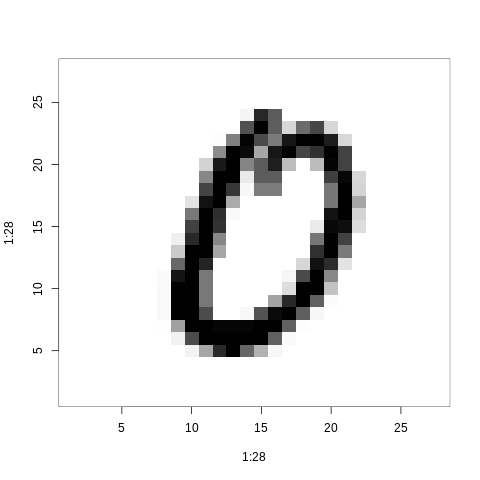

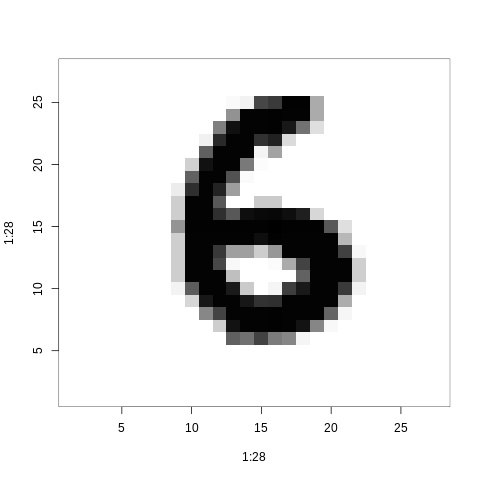

In [0]:
%%R
matrix()
im <- matrix(as.numeric(train_1[4,1:784]), byrow=T, ncol = 28)
im <- t(apply(im,2,rev))
image(1:28, 1:28, im, col=gray((255:0)/255))

im <- matrix(as.numeric(train_1[9,1:784]), byrow=T, ncol = 28)
im <- t(apply(im,2,rev))
image(1:28, 1:28, im, col=gray((255:0)/255))

**Especificar el nombre de las variables de entrada y salida**

In [0]:
%%R
# Specify the response and predictor columns
y <- "C785"
x <- setdiff(names(train), y)

**Como el problema es de clasificación, las variables de respuesta se transforman a factor**

In [0]:
%%R
# Encode the response column as categorical formultinomial classification
train[,y] <- as.factor(train[,y])
test[,y] <- as.factor(test[,y])

**Entrenamiento del modelo**

In [0]:
%%R
model <- h2o.deeplearning(
    x = x,
    y = y,
    training_frame = train,
    validation_frame = test,
    distribution = "multinomial",
    activation = "RectifierWithDropout",
    hidden = c(32,32,32),
    input_dropout_ratio = 0.2,
    sparse = TRUE, #buscar q es sparse!!!!
    l1 = 1e-5,
    epochs = 10)

  |======================================================================| 100%


The model runs for only 10 epochs since it is just meant as a trial run.  In this trial run, we also specified the validation set as the test set.  In addition to (orinstead  of)  using  a  validation  set,  another  option  to  estimate  generalizationerror is N-fold cross-validation.

In [0]:
%%R
# View specified parameters of the deep learning model
print(model@parameters)
# Examine the performance of the trained model
print(model)
# display all performance metrics
print(h2o.performance(model))
# training metrics
print(h2o.performance(model, valid = TRUE))
# validation metrics 
# Get MSE only
print(h2o.mse(model, valid = TRUE))
# Cross-validated MSE

#h2o.mse(model_cv, xval = TRUE) #FALTA

$model_id
[1] "DeepLearning_model_R_1560485668603_1"

$training_frame
[1] "RTMP_sid_9b09_3"

$validation_frame
[1] "RTMP_sid_9b09_4"

$activation
[1] "RectifierWithDropout"

$hidden
[1] 32 32 32

$seed
[1] 1.496812e+18

$input_dropout_ratio
[1] 0.2

$l1
[1] 1e-05

$distribution
[1] "multinomial"

$sparse
[1] TRUE

$x
  [1] "C13"  "C14"  "C15"  "C16"  "C33"  "C34"  "C35"  "C36"  "C37"  "C38" 
 [11] "C39"  "C40"  "C41"  "C42"  "C43"  "C44"  "C45"  "C46"  "C47"  "C48" 
 [21] "C49"  "C50"  "C51"  "C52"  "C59"  "C60"  "C61"  "C62"  "C63"  "C64" 
 [31] "C65"  "C66"  "C67"  "C68"  "C69"  "C70"  "C71"  "C72"  "C73"  "C74" 
 [41] "C75"  "C76"  "C77"  "C78"  "C79"  "C80"  "C81"  "C82"  "C87"  "C88" 
 [51] "C89"  "C90"  "C91"  "C92"  "C93"  "C94"  "C95"  "C96"  "C97"  "C98" 
 [61] "C99"  "C100" "C101" "C102" "C103" "C104" "C105" "C106" "C107" "C108"
 [71] "C109" "C110" "C111" "C114" "C115" "C116" "C117" "C118" "C119" "C120"
 [81] "C121" "C122" "C123" "C124" "C125" "C126" "C127" "C128" "C129" "C13